IntSlider(value=3, continuous_update=False, description='k Value:', max=10, min=1)

Button(description='Run k-NN', style=ButtonStyle())

Output()

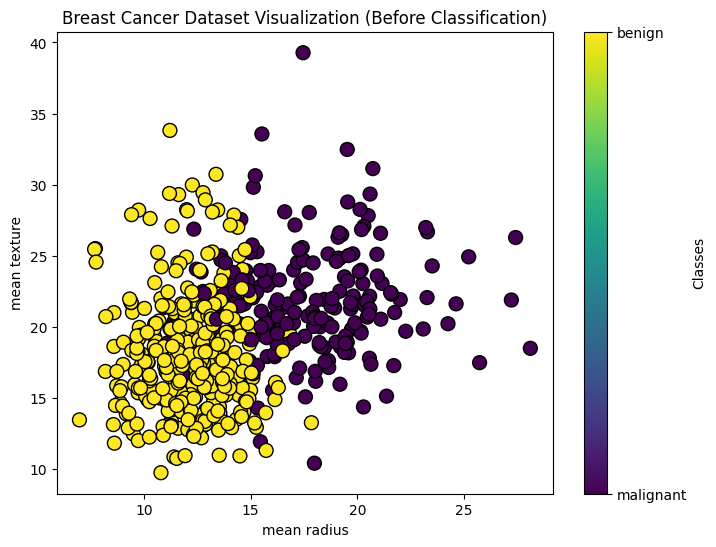

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Features
y = breast_cancer.target  # Labels (target classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a widget for selecting k value
k_slider = widgets.IntSlider(value=3, min=1, max=10, step=1, description='k Value:', continuous_update=False)

# Creating a button widget for running the classification
run_button = widgets.Button(description='Run k-NN')

# Output area to display plots and results
output = widgets.Output()

# Function to run k-NN with selected k value and display results
def run_knn(change):
    with output:
        clear_output()  # Clear previous output

        # Getting the selected k value from the slider
        k = k_slider.value

        # Implementing k-Nearest Neighbors with selected k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)  # Train the k-NN model on the training data

        # Making predictions on the test set
        y_pred = knn.predict(X_test)

        # Evaluate the model's performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)

        # Display the accuracy and classification report
        print(f"Accuracy of k-NN with k={k}: {accuracy * 100:.2f}%")
        print("\nClassification Report:\n", classification_rep)

        # Visualizing the data after classification (using first two features for 2D plot)
        plt.figure(figsize=(8,6))
        scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
        plt.title(f'Breast Cancer Dataset Classification Visualization (After Classification with k={k})')
        plt.xlabel(breast_cancer.feature_names[0])  # Feature 1
        plt.ylabel(breast_cancer.feature_names[1])  # Feature 2
        colorbar = plt.colorbar(scatter, label='Predicted Classes')
        colorbar.set_ticks([0, 1])
        colorbar.set_ticklabels(breast_cancer.target_names)  # Adding class labels to colorbar
        plt.show()

# Connecting the button to the function
run_button.on_click(run_knn)

# Displaying the widgets and output area
display(k_slider, run_button, output)

# Initial visualization (before classification)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Breast Cancer Dataset Visualization (Before Classification)')
plt.xlabel(breast_cancer.feature_names[0])  # Feature 1
plt.ylabel(breast_cancer.feature_names[1])  # Feature 2
colorbar = plt.colorbar(scatter, label='Classes')
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(breast_cancer.target_names)  # Adding class labels to colorbar
plt.show()
